In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import os
from os.path import join as oj
import sys
import time
from functions import neural_interactome
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import seaborn as sns

from ipywidgets import IntProgress
from IPython.display import display
import random

In [2]:
# paths/directories
data_dir = "data"
out_dir = "saved_dynamics"

# Model Parameters for Neural Interactome
E = -48.0 * np.load(oj(data_dir, 'emask_default.npy'))  # N x 1 directionality vector
Gg_Static = np.load(oj(data_dir, 'Gg_default.npy'))  # N X N matrix of gap junction connections
Gs_Static = np.load(oj(data_dir, 'Gs_default.npy'))  # N X N matrix of synaptic junction connections
#input_Array = np.zeros(Gg_Static.shape[0])  # N x 1 vector of initial voltages



In [3]:
def GenerateRecordings(NumRecordings, NumTimesteps, PercentPerturbed, AmountPerturbed):
    """
    Parameters
    ----------
    - NumRecordings : Int, number of recordings to generate
    - NumTimesteps : Int, number of timesteps in each recording
    - PercentPerturbed : 0-1 float, Percent of total neurons given inital activation
    - AmountPerturbed: 0-1 float, Initial activation for perturbed neurons
    """
    NumNeurons = 279
    NumPerturbed = int(NumNeurons // (1/PercentPerturbed))
    
    saved_dynamics_array=pd.DataFrame()
    df=pd.DataFrame()
    
    f = IntProgress(min=1, max=NumRecordings+1) # instantiate the progress bar
    display(f) # display the bar

    for i in range(NumRecordings):
        #some function that runs existing simulation on github with randomized starting parameters
        #and outputs saved_dynamics
        #generate random inital conditions
        input_Array = np.zeros(Gg_Static.shape[0])
        chosenNeurons = random.sample(range(NumNeurons), NumPerturbed)
        print("Chosen Neurons"+str(chosenNeurons))
        input_Array[chosenNeurons] = AmountPerturbed
        
        #run sim
        out = neural_interactome.run_NI_sim(input_Array, Gg_Static, Gs_Static, E, max_time = NumTimesteps)   
        #print(out[200:,:].shape)
        #np.savetxt('data/' +'run1cutoff.csv', out[200:,:], delimiter=",")
        #np.savetxt('data/' +'run1cutoff.csv', out, delimiter=",")
        for j in range(len(out[0,:])):
            df1 = pd.DataFrame({ 'voltage':out[:,j], 'neuron':j, 'run':i} )
            df1['timestep'] = df1.index
            
            df = df.append(df1)
            
        f.value += 1

    return df


In [4]:
''' 
Step 1: Generate lots of dynamics recordings
'''  


saved_dynamics_array = GenerateRecordings(2, 1000, 0.1, 0.5)
#example usage:
#saved_dynamics_array.voltage.tolist()
#saved_dynamics_array.loc[(saved_dynamics_array.run == 1)&(saved_dynamics_array.neuron == 25)].plot(y='voltage', use_index=True)
saved_dynamics_array.to_csv('data/' +'saved_dynamics_array.csv')

#np.save(oj('data', 'saved_dynamics_array' + '.npy'), saved_dynamics_array)

IntProgress(value=1, max=3, min=1)

Chosen Neurons[146, 26, 109, 143, 185, 13, 254, 218, 192, 96, 273, 248, 223, 126, 0, 250, 51, 53, 52, 25, 94, 37, 114, 88, 44, 148, 210]


/Users/quileesimeon/GitHub Repos/worm-graph/InitialWorkingExamples/functions/neural_interactome.py:248: RuntimeWarning: invalid value encountered in reciprocal
  np.reciprocal(1.0 + np.exp(-B*(np.subtract(Vvec, Vth)))))
/Users/quileesimeon/GitHub Repos/worm-graph/InitialWorkingExamples/functions/neural_interactome.py:248: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-B*(np.subtract(Vvec, Vth)))))
/var/folders/gt/yfshn_6x75s5dn01m8wdh2180000gp/T/ipykernel_72556/524532667.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
/var/folders/gt/yfshn_6x75s5dn01m8wdh2180000gp/T/ipykernel_72556/524532667.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
/var/folders/gt/yfshn_6x75s5dn01m8wdh2180000gp/T/ipykernel_72556/524532667.py:37: FutureWarning: T

Chosen Neurons[133, 260, 72, 174, 224, 189, 179, 65, 112, 68, 6, 53, 47, 151, 168, 234, 264, 212, 144, 186, 206, 20, 124, 277, 35, 79, 95]


/Users/quileesimeon/GitHub Repos/worm-graph/InitialWorkingExamples/functions/neural_interactome.py:248: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-B*(np.subtract(Vvec, Vth)))))
/var/folders/gt/yfshn_6x75s5dn01m8wdh2180000gp/T/ipykernel_72556/524532667.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
/var/folders/gt/yfshn_6x75s5dn01m8wdh2180000gp/T/ipykernel_72556/524532667.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
/var/folders/gt/yfshn_6x75s5dn01m8wdh2180000gp/T/ipykernel_72556/524532667.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
/var/folders/gt/yfshn_6x75s5dn01m8wdh2180000gp/T/ipykernel_72556/524532667.py:37:

In [5]:
saved_dynamics_array

,voltage,neuron,run,timestep
0,-500.000000,0,0,0
1,-500.000000,0,0,1
2,-500.000000,0,0,2
3,-500.000000,0,0,3
4,-500.000000,0,0,4
...,...,...,...,...
995,-312.898086,278,1,995
996,-312.899083,278,1,996
997,-312.899807,278,1,997
998,-312.900268,278,1,998


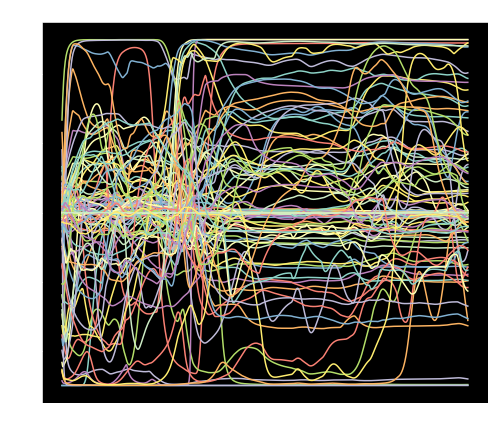

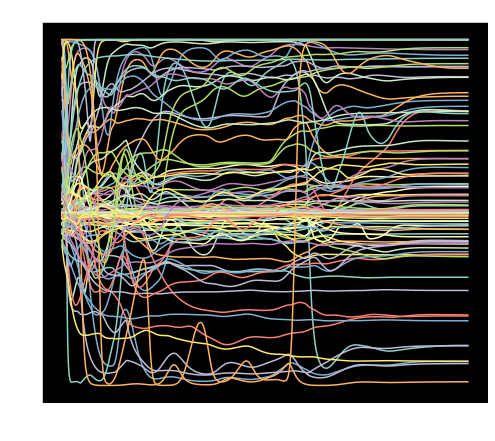

In [6]:
#reshaping+truncating data for visual check
pivoted = saved_dynamics_array.loc[(saved_dynamics_array.run == 0)].pivot(index='timestep', columns='neuron', values='voltage')
pivoted = pivoted.truncate(before=0, after=100, axis="columns")
pd1 = pivoted

pivoted = saved_dynamics_array.loc[(saved_dynamics_array.run == 1)].pivot(index='timestep', columns='neuron', values='voltage')
pivoted = pivoted.truncate(before=0, after=100, axis="columns")
pd2 = pivoted

pd1.plot(figsize=(8, 7), title='Voltage, Initial Conditions 1, first 100 neurons',legend=None);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

pd2.plot(figsize=(8, 7), title='Voltage, Initial Conditions 2, first 100 neurons',legend=None);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

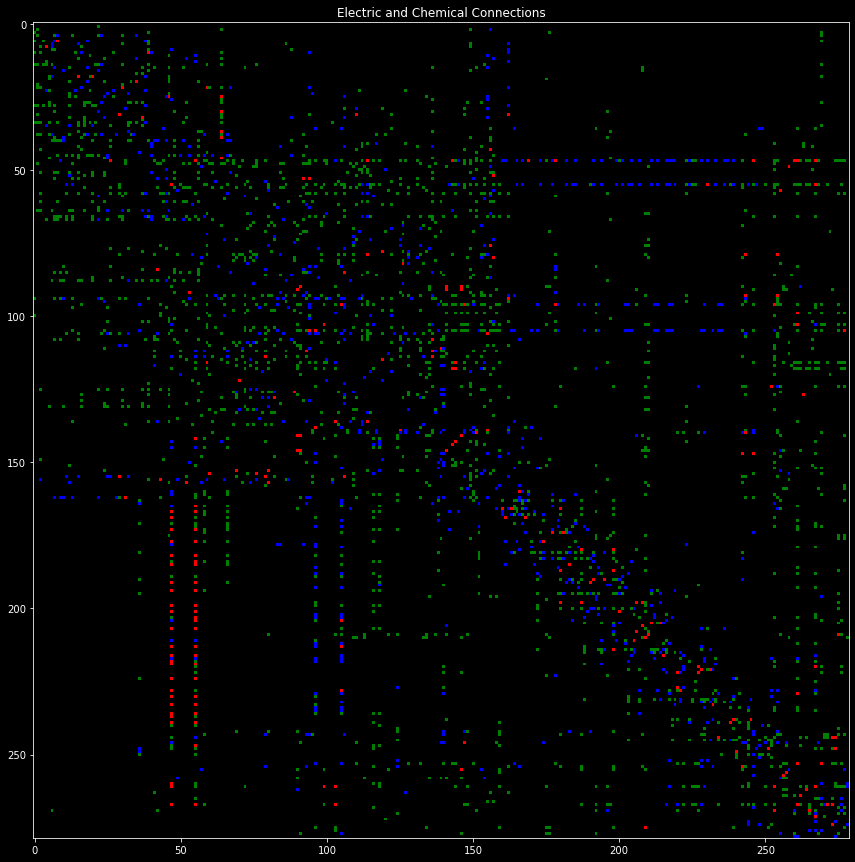

In [12]:
# Check for mutual connections
Gg_Static_tmp = np.where(Gg_Static != 0,1,Gg_Static) #electrical
Gs_Static_tmp = np.where(Gs_Static != 0,2,Gs_Static) #chemical

from matplotlib import colors
cmap = colors.ListedColormap(['black', 'blue', 'green', 'red'])
bounds=[0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
ax.set_title('Electric and Chemical Connections')
plot = ax.imshow(Gg_Static_tmp+Gs_Static_tmp, cmap=cmap, interpolation='none')

In [55]:
saved_dynamics_array = GenerateRecordings(20, 1000, 0.1, 0.5)


IntProgress(value=1, max=21, min=1)

Chosen Neurons[120, 183, 255, 268, 123, 132, 266, 18, 44, 49, 203, 29, 20, 234, 38, 100, 52, 115, 161, 271, 254, 73, 245, 273, 257, 232, 51]


C:\GitHub\gnn_simple\functions\neural_interactome.py:248: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-B*(np.subtract(Vvec, Vth)))))


Chosen Neurons[277, 100, 183, 91, 213, 26, 262, 204, 116, 202, 10, 23, 175, 205, 105, 186, 270, 111, 137, 244, 78, 233, 46, 134, 240, 34, 48]
Chosen Neurons[119, 238, 200, 232, 190, 79, 97, 155, 70, 274, 95, 148, 12, 275, 158, 136, 243, 208, 131, 41, 237, 206, 5, 213, 132, 1, 66]
Chosen Neurons[94, 83, 44, 264, 277, 224, 27, 41, 42, 210, 134, 172, 157, 151, 253, 66, 270, 171, 121, 198, 271, 267, 15, 265, 192, 209, 50]
Chosen Neurons[14, 241, 86, 107, 189, 228, 80, 260, 176, 104, 46, 9, 248, 207, 51, 53, 223, 179, 84, 266, 203, 68, 90, 271, 108, 155, 40]
Chosen Neurons[73, 261, 209, 149, 270, 46, 271, 84, 156, 12, 196, 203, 222, 204, 166, 274, 182, 251, 95, 110, 121, 68, 15, 14, 155, 269, 241]
Chosen Neurons[90, 54, 94, 208, 244, 134, 65, 258, 160, 197, 56, 255, 77, 44, 194, 14, 52, 155, 241, 275, 121, 140, 153, 195, 127, 63, 141]
Chosen Neurons[276, 19, 0, 113, 102, 167, 140, 101, 9, 127, 93, 189, 51, 38, 91, 216, 120, 143, 178, 128, 11, 14, 190, 159, 204, 153, 59]
Chosen Neurons[100, 

In [13]:
#output timeseries data from single neuron and it's connected neurons, also connectivity
chosenNeuron = "URAVL"

import re
from ast import literal_eval
import numpy as np
a = open("data/neuron_names_cleaned.txt", "r")
neuronlist = a.read().splitlines()
a.close()

neuronNumber = neuronlist.index(chosenNeuron)

#find connections (for "IL2DL")
print(np.nonzero(Gs_Static_tmp[neuronNumber,:]))
print(np.nonzero(Gs_Static_tmp[:,neuronNumber]))
print(np.nonzero(Gg_Static_tmp[neuronNumber,:]))
print(np.nonzero(Gg_Static_tmp[:,neuronNumber]))

#output timeseries
chosenOutputs = np.concatenate(([neuronNumber], np.nonzero(Gs_Static_tmp[neuronNumber,:])[0],np.nonzero(Gs_Static_tmp[:,neuronNumber])[0],np.nonzero(Gg_Static_tmp[neuronNumber,:])[0],np.nonzero(Gg_Static_tmp[:,neuronNumber])[0]))
print(chosenOutputs)

(array([ 1, 30], dtype=int64),)
(array([14, 28, 34, 38], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
[21  1 30 14 28 34 38]


In [64]:
input_dynamics = saved_dynamics_array.loc[(saved_dynamics_array.run == 0)].pivot(index='timestep', columns='neuron', values='voltage').values
for i in range(saved_dynamics_array["run"].max()):
    d1 = saved_dynamics_array.loc[(saved_dynamics_array.run == i+1)].pivot(index='timestep', columns='neuron', values='voltage').values
    input_dynamics = np.dstack((input_dynamics,d1))
data = np.transpose(input_dynamics, (2, 1, 0))

In [87]:
finaldata = data[:,chosenOutputs,:]


finaldata.tofile('URAVL.csv', sep = ',')



In [99]:
arrReshaped = finaldata.reshape(finaldata.shape[0], -1)
# saving reshaped array to file.
np.savetxt('URAVL.csv', arrReshaped)
# retrieving data from file.
loadedArr = np.loadtxt('URAVL.csv')
loadedOriginal = loadedArr.reshape(loadedArr.shape[0], loadedArr.shape[1] // 1000, 1000)

In [100]:
loadedOriginal.shape

(20, 7, 1000)

In [98]:
finaldata.shape[2]

1000